<a href="https://colab.research.google.com/github/Swathi014/ZEOTAP-Data-Science-Assignment-eCommerce-Transactions/blob/main/Swathi_P_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers = pd.read_csv('/content/drive/MyDrive/Internship/Zeotap/Dataset/Customers.csv')
products = pd.read_csv('/content/drive/MyDrive/Internship/Zeotap/Dataset/Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Internship/Zeotap/Dataset/Transactions.csv')

In [9]:
print(customers.info())
print("**"*20)
print(products.info())
print("**"*20)
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):


In [10]:
print(customers.describe())
print("**"*20)
print(products.describe())
print("**"*20)
print(transactions.describe())

       CustomerID    CustomerName         Region  SignupDate
count         200             200            200         200
unique        200             200              4         179
top         C0185  Kathleen Logan  South America  2022-04-16
freq            1               1             59           3
****************************************
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
****************************************
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


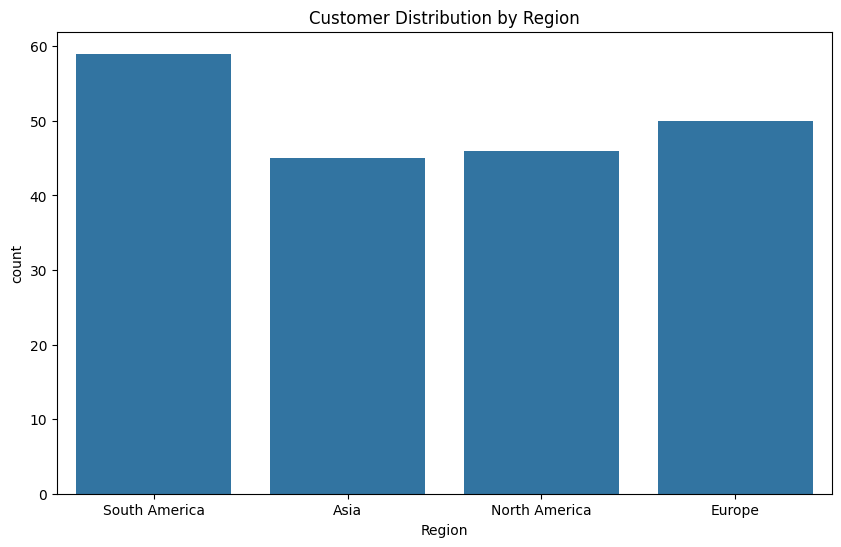

In [11]:
#customer distribution by region

plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.show()

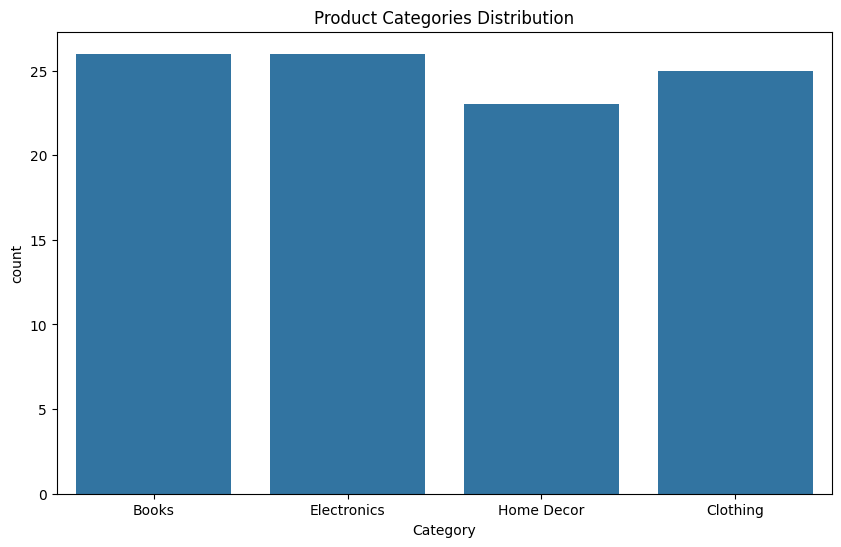

In [12]:
#product categories Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=products, x='Category')
plt.title('Product Categories Distribution')
plt.show()

In [16]:
# Analyze transaction values over time
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')

monthly_sales = transactions.groupby('Month')['TotalValue'].sum().reset_index()

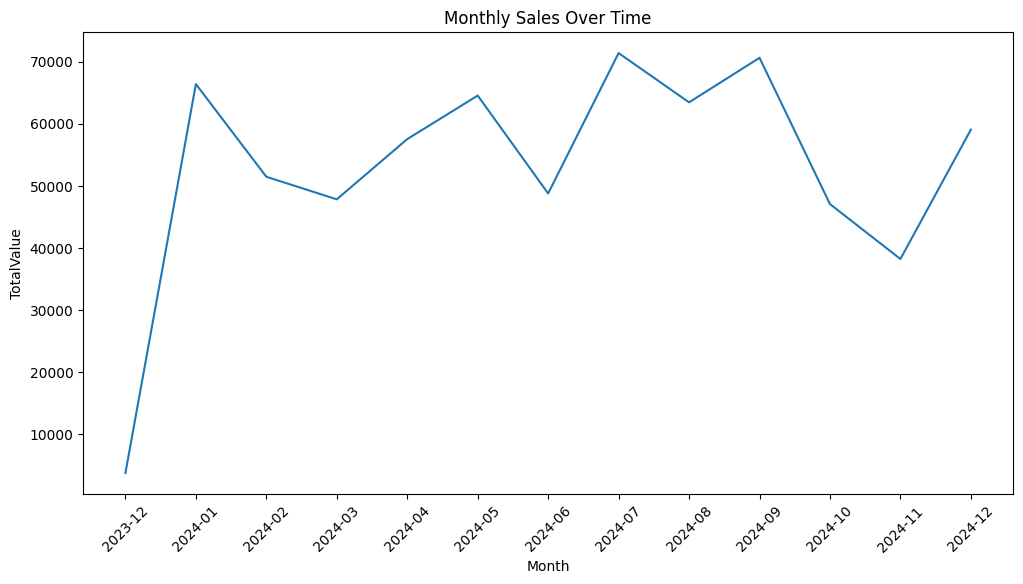

In [17]:
# Converting 'Month' column to string before plotting

monthly_sales['Month'] = monthly_sales['Month'].astype(str)  # Convert Period objects to strings

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='TotalValue')
plt.title('Monthly Sales Over Time')
plt.xticks(rotation=45)
plt.show()